# Questions answered in this report

1. Is there a relationship between the team that sent the most players to the AllStar Games and the mean salary of each of their players vs the entire league since 1985
2. What are the characteristics of baseball players with the highest salaries?
3. I want to figure out of there is a correlation between players salaries and awards won?¶

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/wafic/anaconda/envs/py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Load Baseball Data from CSV

In [2]:
# AllStarFull - All-Star appearances
AllStarFull = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/AllstarFull.csv')

# HallofFame - Hall of Fame voting data
HallofFame = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/HallofFame.csv')

#Pitching table
Pitching = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Pitching.csv')

#Batting table
Batting = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Batting.csv')

# Managers - managerial statistics
Managers = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Managers.csv')

# Teams - yearly stats and standings 
Teams = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Teams.csv')

# Salaries - player salary data
Salaries = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Salaries.csv')

# AwardsManagers - awards won by managers 
AwardsManagers = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/AwardsManagers.csv')

# AwardsPlayers - awards won by players
AwardsPlayers = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/AwardsPlayers.csv')

# Appearances - details on the positions a player appeared at
Appearances = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Appearances.csv')

# CollegePlaying - list of players and the colleges they attended
CollegePlaying = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/CollegePlaying.csv')

# master - Players information
Master = pd.read_csv('/Users/wafic/Documents/DAND/2_Intro_to_Data/baseballdatabank-2017.1/core/Master.csv')


# Investigate Data Types of Variables & Null Count

#### Used the below functions to figure out the variables and missing records
#Salaries.info()
#AwardsPlayers.isnull().sum() #Here I will check if there is a high value of nulls that will make the series useless
#len(AwardsManagers)

##### Below are all the variables with missing records in every table that will be used

#### AllStarFull Table

- gameID           49 (Drop entire record)
- GP               19 (Drop entire record)
- startingPos    3548 (Drop entire column)

In [3]:
#Treating AllStarFull Table
#First dtop entire column startingPos
AllStarFull_New = AllStarFull.drop('startingPos', axis=1)
#Then drop the entire rows with the missing gameID and GP
AllStarFull_New = AllStarFull_New.dropna()

#### HallofFame


- ballots 195 records
- needed 352
- votes 195
- needed_notes 3999


- For ballots, needed and votes we can simply convert them replace them with zero because the are by most less than 10% of the records and wouldnt make sence to drop the entire row.
- As for needed_note we need to drop the entire column

In [4]:
HallofFame_New = HallofFame.drop('needed_note', axis=1)

#### Teams Table


- lgID                50 (Replace with 0)
- divID             1517 (Drop enire variable)
- Ghome              399 (Replace with 0)
- DivWin            1545 (Drop enire variable)
- WCWin             2181 (Drop enire variable)
- LgWin               28 (Replace with 0)
- WSWin              357 (Replace with 0)
- SO                 120 (Replace with 0)
- SB                 144 (Replace with 0)
- CS                 859 (Drop enire variable)
- HBP               2325 (Drop enire variable)
- DP                 317 (Replace with 0)
- park                34 (Replace with 0)
- attendance         279 (Replace with 0)

#### AwardsManager Table

- tie         177 (Drop entire column)
- notes       178 (Drop entire column)

#### AwardsPlayers Table

- tie         6111 (Drop entire column)
- notes       1448 (Drop entire column)

#### Appearances Table

- lgID           737 (Since number is so small from the entire data, we can delete the entire records)
- GS           12595 (Drop entire column)
- G_dh         12595 (Drop entire column)
- G_ph         12595 (Drop entire column)
- G_pr         12595 (Drop entire column)

#### Master Table

- birthYear        132
- birthMonth       302
- birthDay         449
- birthCountry      69
- birthState       571
- birthCity        180
- deathYear       9664
- deathMonth      9665
- deathDay        9666
- deathCountry    9669
- deathState      9715
- deathCity       9674
- nameFirst         37
- nameGiven         37
- weight           854
- height           785
- bats            1185
- throws           979
- debut            195
- finalGame        195
- retroID           56
- bbrefID            2

In [5]:
#I will replace all null values with zero because it doesnt make sence to remove entire row for one missing observation
#and I can use mean for string and date observations
master_new = Master.fillna(value=0)

## Investigating the Data

#### Below is a list of the number of players in most tables which gives us an idea of which tables to concentrate that have useful data about the players

In [6]:
#Number of unique players
len(Master['playerID'].unique())

19105

In [7]:
#Number of players that played baseball at college
len(CollegePlaying['playerID'].unique())

6575

In [8]:
#Number of players salaries available for players from 1985
len(Salaries['playerID'].unique())

5155

In [9]:
#Number players whom participated in the All Star Games since 1933
len(AllStarFull['playerID'].unique())

1774

In [10]:
#Number of players in hall of fame since 1936
len(HallofFame['playerID'].unique())

1260

In [11]:
#Number of players with at least 1 award
len(AwardsPlayers['playerID'].unique())

1343

In [12]:
#Number of players that have pitched
len(Pitching['playerID'].unique())

9302

In [13]:
#Number of players that have batted, which is double the number of pitching players
len(Batting['playerID'].unique())

18915

## Useful General Functions

In [14]:
#Usefull function to group by playerID and sum any other column in dataframe
def grouping(dataframe, column):
    grouped_data = dataframe.groupby('playerID').sum()[column]
    return grouped_data

In [15]:
#Returns data sets without zero which in some cases can be useful to have a more accurate mean
def remove_zero(dataframe):
    return dataframe[dataframe != 0]

In [16]:
#Due the fact that most data is best after 1985,I decided to build this function
def after_1985(dataframe):
    return dataframe.loc[dataframe['yearID'] >= 1985]

In [17]:
#Usefull function to group by playerID and count any other column in dataframe
def grouping_count(dataframe, column):
    return dataframe.groupby('playerID')[column].count().to_frame('count').reset_index()

###  Batting Stats per Player
These are some stats around baseball that can be useful in understanding the data

In [18]:
#Due the fact that most data is best after 1985,I decided to build my data on these dates for these stats
batting_1985 = after_1985(Batting)

In [19]:
#Batting average (BA) per player after year 1985
bats_by_player = grouping(batting_1985, ['AB'])
hits_by_player = grouping(batting_1985, ['H'])
batting_avg = hits_by_player['H'].div(bats_by_player['AB'])
batting_avg.dropna(inplace = True) #removed rows with Null values

In [20]:
#number of homerun hits per player
homeruns = grouping(batting_1985, ['HR']).apply(remove_zero)

In [21]:
#RBI per player
RBIs = grouping(batting_1985, ['RBI']).apply(remove_zero)

In [22]:
#Runs Scored per player
runs = grouping(batting_1985, ['R']).apply(remove_zero)

In [23]:
#Stolen Bases per player
stolen_bases = grouping(batting_1985, ['SB']).apply(remove_zero)

### Pitching Stats per Player
These are some stats around baseball that can be useful in understanding the data

In [24]:
#Due the fact that most data is best after 1985,I decided to build my data on these dates for these stats
#Pitching.ix[(Pitching['yearID']==1985)]
pitching_1985 = after_1985(Pitching)

In [25]:
#Number of strikeouts per player
strikeouts = grouping(pitching_1985, ['SO']).apply(remove_zero)

In [26]:
#Number of wins per player
wins = grouping(pitching_1985, ['W']).apply(remove_zero)

In [27]:
#Earned runs average per player
era = grouping(pitching_1985, ['ERA']).apply(remove_zero)

In [28]:
#WHIP average per player
#WHIP = (Number of hits allowed + Number of walks allowed) / Number of Innings Pitched
number_hits = grouping(pitching_1985, ['H']).apply(remove_zero)
number_walks = grouping(pitching_1985, ['BB']).apply(remove_zero)
innings_pitched = grouping(pitching_1985, ['IPouts']).apply(remove_zero)
whip = ( number_hits['H'] + number_walks['BB']) / innings_pitched['IPouts']

In [29]:
#Saves
saves = grouping(pitching_1985, ['SV']).apply(remove_zero)

### Question 1: Is there a relationship between the team that sent the most players to the AllStar Games and the mean salary of each of their players vs the entire league since 1985
In other words, will teams with the highest participations yield a player salary increase

#### 1. Preparing data sets

In [30]:
# Extract only the AllStarGames obserations  
salaries_AL = Salaries.ix[(Salaries['lgID']=='AL')]

#### 2. Preparing functions

In [31]:
#Correlation function
def correlation(x, y):
    variable_1 = (x - x.mean()) / x.std(ddof=0)
    variable_2 = (y - y.mean()) / y.std(ddof=0)

    correlation = (variable_1 * variable_2).mean()
    
    return correlation

In [32]:
# Team that sent the most to the AllStarGames
def teams(dataframe,n):
    sorted_teams = dataframe.groupby('teamID')[['playerID']].count().sort_values('playerID', ascending = False)
    # return the list of top 'n' teams and the list of number of players
    return list(sorted_teams.index)[:n], list(sorted_teams.values)[:n]

#### 3. Data investigation

In [33]:
#This is the team thta have sent the highest number of players to the Allstar Games since 1985
team, number = teams(salaries_AL,1)
print team, number

['CLE'] [array([948])]


In [34]:
#1.a. Mean salary of every player of the team with the highest number of players sent
best_team_salaries = salaries_AL.loc[salaries_AL['teamID'].isin(team)].groupby('playerID')['salary'].agg(['mean'])

In [35]:
#1.b. Number of player appearances from the top team in the AllStarGames
best_team_appearances = salaries_AL.loc[salaries_AL['teamID'].isin(team)].groupby('playerID')['yearID'].agg(['count'])

In [36]:
#1.c correlation between players salaries and their apperances for the team with most AllStar appearances
salaries_top = best_team_salaries.values
appearances_top = best_team_appearances.values
correlation(salaries_top, appearances_top)

0.20706655050823675

In [37]:
#2.a Mean salary for players for the entire league
Allstar_salaries = salaries_AL.groupby('playerID')['salary'].agg(['mean']) #mean salary of every player

In [38]:
#2.b Number of player appearances from the entire league in the AllStarGames
Allstar_appearances = salaries_AL.groupby('playerID')['playerID'].agg(['count'])

In [39]:
#2.c correlation between players salaries and their appearances for the entire league
salaries_league = Allstar_salaries.values
appearances_league = Allstar_appearances.values
correlation(salaries_league, appearances_league)

0.33604770568222836

In [40]:
#Scatter plot function that will plot both groups variable in relation with each other
def scatterplot(dataframe, x, y):
    ax = dataframe.plot.scatter(x='count', y='mean', title='Scatter Plot')
    ax.set_xlabel("Player Participations in AllStar Games")
    ax.set_ylabel("Player Salary")
    return ax

In [41]:
#Tables with players mean salaries and number of participations in AllStar games
top_team_players = best_team_salaries.reset_index().merge(best_team_appearances.reset_index(), on='playerID', how='inner')

In [42]:
#Tables with players mean salaries and number of participations in entire league
all_team_players = Allstar_salaries.reset_index().merge(Allstar_appearances.reset_index(), on='playerID', how='inner')

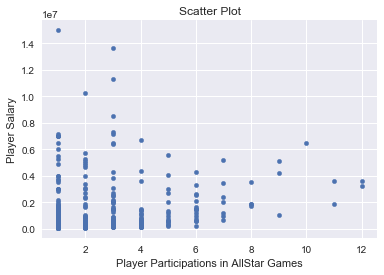

In [43]:
#Plotting top All Star Games team
scatterplot(top_team_players, 'count', 'mean')

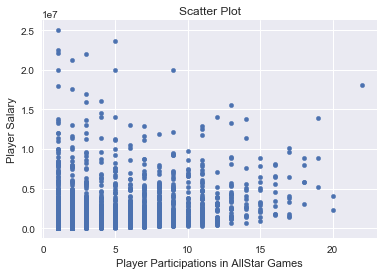

In [44]:
#Plotting the All Star Games teams
scatterplot(all_team_players, 'count', 'mean')

#### 4. Result

Null hypothesis: There is no relationship between a player salary and number of times he participate in the All Star Games.

Alternative hypothesis: I expected that the player whom participate in the ALL Star Games are those who tend to get the highest salaries.

Looking at the relationship above between player participation and mean salary, we can see that it is positive for both groups but its even better for the entire All Star Games teams participations that the team with the highest number of AllStar participations (in this case it was Cleveland Indians).

If we look at the above scatter plot, we can see that players that partipated the most tends to have a lower salary in both groups of players.

We can't accept or reject the null hypythesis solely on this test but it can be a start to understand more about baseball data. 

For example, when I see that the highest paid players have the lowest participations, it make me curious to think about the nature of the league (maybe it aint as important as other leagues and couches prefer to keep their top players on the bench to rest) it also makes me think that maybe teams that are smaller(thus have lower paid players) tend to value this league more than the big players which  maybe gets us to study the nature of the teams.

### Question 2: What are the characteristics of baseball players with the highest salaries?

#### Problems I faced
I started by taking the mean of every player along with the number of years he played an dhere I faced 2 problems:
1. Player with the highest salary played only 1 year (2016) which makes sense because of inflation and other aspects of money.
2. Second problem I noticed that is that if I take the mean, I will be excluding lots of players whom will have their salaries mean lowered due to their first few seaons when their salaries where quite low
3. If I decide to take the highest salary a player got paid during his career, I will also be subject to the error related to the valeu of money over time

#### Solution
- I decided to limit the study for the last 10 years which dramatically reduces the error of money value overtime
- I decided to take the sum of all salaries a player got during the 5 years 

#### 1. Preparing the data sets

Sample size: 40 players (20 top paid and 20 lowest paid)

In [45]:
#players salaries table from 2007 till 2016 which gives 5804 observations to work with
salaries_10 = Salaries.loc[Salaries['yearID'] > 2006]

In [46]:
#Grouped players and extracted the sum of theor salaries and the number of seasons
#df1.groupby(["Name", "City"]).size().reset_index(name='count')
sorted_players_10 = salaries_10.groupby('playerID')['salary'].agg(['sum', 'count']).reset_index().sort_values('sum', ascending = False)

In [47]:
#Extract the top 20 players
#The sample below represnets players whom have played the same number of seasons during past 10 years
#If we eyeball the salaries, there are no outliers on either sides which makes me confident that studying /
#These players characterstics will give me a good idea about what makes them special
top_20_players = sorted_players_10.head(20).reset_index()

In [48]:
#To better understand what makes these top 20 players special, I will extract the players with the lowest salaries / 
#and whom participated in at least 8 seasons during the past 10 years
worst_20_players = sorted_players_10.loc[sorted_players_10['count'] >= 8].sort_values('count', ascending = False).tail(20)

#### 2. Preparing functions

In [49]:
#Function that will integrate top_20_players and worst_20_players with other tables to investigate
def merge_tables(dataframe_a, dataframe_b):
    return dataframe_a.merge(dataframe_b, on='playerID', how='inner')

In [50]:
#Function that will plot 2 groups of players based on the KPI we want to compare
def plot_function(dataframe_a, dataframe_b, y_axis, y_label):
    fig = plt.figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    dataframe_a.plot.bar(x='playerID', y= y_axis, color=['crimson'], legend=False, ax=ax1, figsize=(15,5))
    ax1.set_title("Top 20 Paid players")
    ax1.set_ylabel(y_label)    
    ax2.set_ylim((0, dataframe_a[y_axis].max()))
    dataframe_b.plot.bar(x='playerID', y= y_axis, color=['blue'], legend=False, ax=ax2, figsize=(15,5))
    ax2.set_title("Worst 20 Paid Players")
    plt.tight_layout()

#### 3. Data Investigation

#### a. Plotting players salaries of both groups

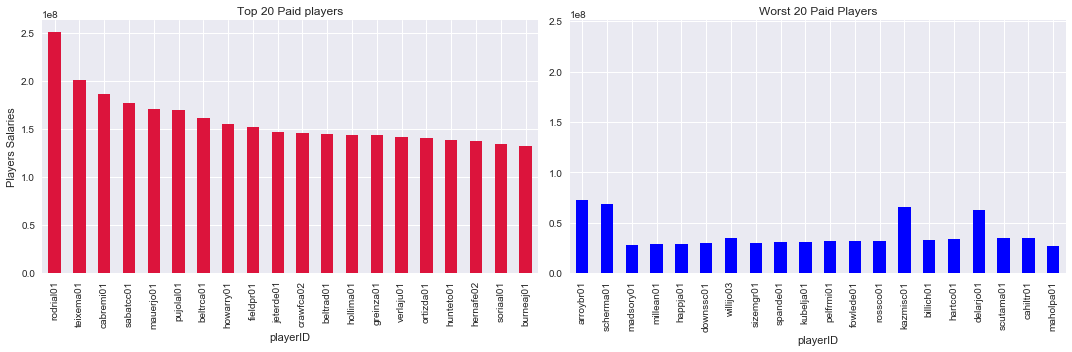

In [51]:
plot_function(top_20_players, worst_20_players, "sum", "Players Salaries")

##### Summary 1:

Putting the highest paid players vs the lowest paid side by side on same scale, we can see how the gap between these 2 players is. The lowest paid player in the top 20 group gets almost double the highest in the least paid group which can be due to several factors we investigated below:

#### b. Players Batting Average

In [52]:
#Batting average per player
BA = batting_avg.to_frame('BA').reset_index()

In [53]:
#Merging both players groups with the batting average
top_players_BA = merge_tables(BA, top_20_players)
worst_players_BA = merge_tables(BA, worst_20_players)

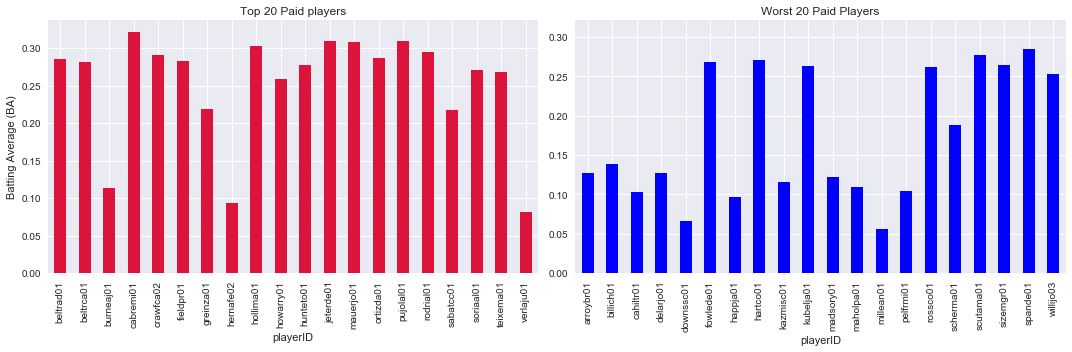

In [54]:
#As we can see below side by side, most players in the highest salaries perform better 
plot_function(top_players_BA, worst_players_BA, "BA", 'Batting Average (BA)')

In [55]:
correlation(top_players_BA['BA'].values, top_20_players['sum'].values)

0.071260404140410877

In [56]:
correlation(worst_players_BA['BA'].values, worst_20_players['sum'].values)

-0.092277866412608142

##### Summary 2:

Null hypothesis: BA has no affect on player salary.
Alternative hypothesis: The higher a player BA the more attractive he is and gets a better deal on his money.

Considering the BA to be among the most important KPIs in a player, we can see that both groups have high and low batting average, but does the players with the high salary tend to get them because of having a better BA. Looking at the correlation between the 2 groups we cant see any correlation, infact for the least paid players, we can see that it is negative (the better the BA the lower they get paid). 

The issue with BA is that it takes into consideration the hits by a player and divides them with the bats by the player, so if the player bats are low, there is a high probability his BA is great but only because he doesnt participate that much, similar to ratio of accident per driver, if I drive 20 KM per day the perc of having an accident is much lower than a taxi driver that might drive 500Km per day but taking this ratio alone doesnt imply I am a better driver.

To conclude, we can accept ot neglect that BA affects a player salary directly because there are lot sof other lurking variables, for example what if a player doesn't bat because his of playing position but is a top player. Also to better understand the BA and any KPI I think we need to look at the number of games a player played during the last 10 years

#### c. Number of games played per player

In [57]:
# Number of total games played per player
total_games = grouping(Appearances, ['G_all']).reset_index()

In [58]:
top_players_games = merge_tables(total_games, top_20_players)
worst_players_games = merge_tables(total_games, worst_20_players)

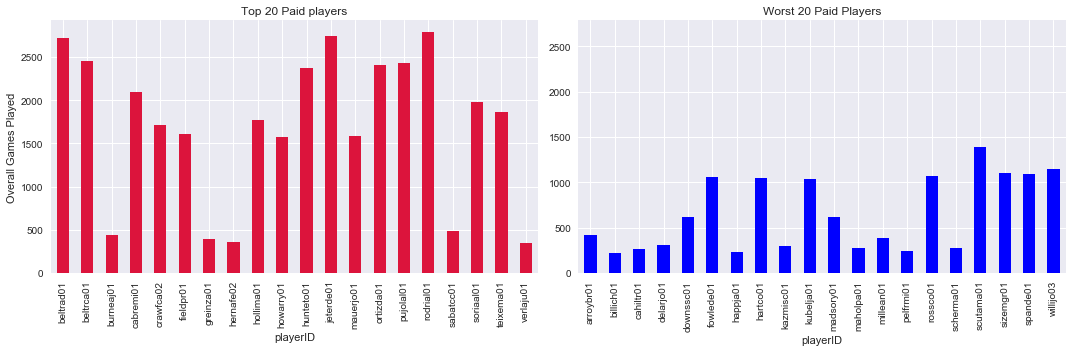

In [59]:
plot_function(top_players_games, worst_players_games, "G_all", 'Overall Games Played')

In [60]:
correlation(top_players_games['G_all'].values, top_20_players['sum'].values)

0.18441328404709453

In [61]:
correlation(worst_players_games['G_all'].values, top_20_players['sum'].values)

-0.40614965489761384

##### Summary 3:

Null hypothesis: Number of games has no affect on player salary.

Alternative hypothesis: The more a player plays the better he get paid because this proves he is a successful player.

We can easily see that high paid players plays a heck more games in the past 10 years than their fellow mates. Although the correlation is weak for the top players I think we have something interesting because usually the top players get to be bought and sold by the teams and coaches purchase players (along with a high yearly salary) for one single reason, they want them to play and to play almost every game in any league and by doing so the players gets more real life practice and gets more experience and become more valuable.

although there is not enough evidence that games played gets you better paid, I assure that if we aggregate this variable with another variable we will definitely have a higher correlation and a better linear regression model for players to use to achieve higher salaries. 

I would love to get the number of hours players played in their entire career vs their salaries because I believe the more hours would definitely mean better salaries.

#### d. homeruns by player

In [62]:
hr = homeruns.reset_index()

In [63]:
top_players_hr = merge_tables(hr, top_20_players)
worst_players_hr = merge_tables(hr, worst_20_players)

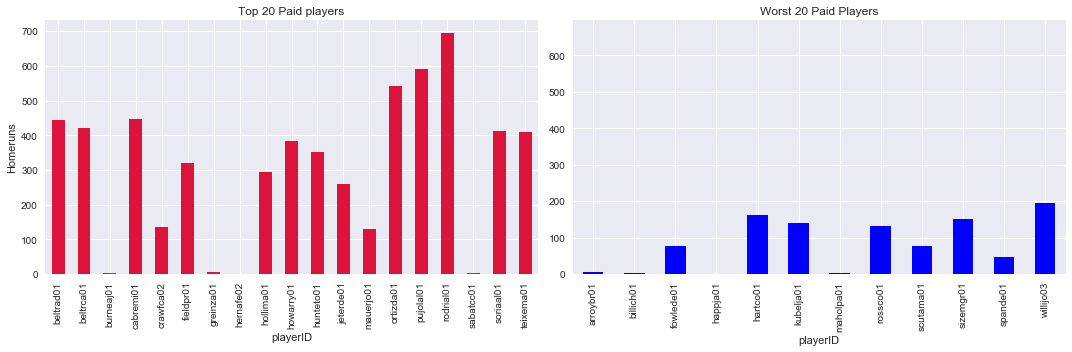

In [64]:
plot_function(top_players_hr, worst_players_hr, "HR", 'Homeruns')

##### Summary 4:
Looking at HR, I dont think we can build a hypothesis around it because lots of players in the sample has zero homeruns which is due to their position in the games, for that we will keep this KPI aside.

#### e. Number of awards awarded to players

In [65]:
awards_count = AwardsPlayers.groupby('playerID')['awardID'].count().to_frame('awards').reset_index()

In [66]:
top_players_awards = merge_tables(awards_count, top_20_players)
worst_players_awards = merge_tables(awards_count, worst_20_players)

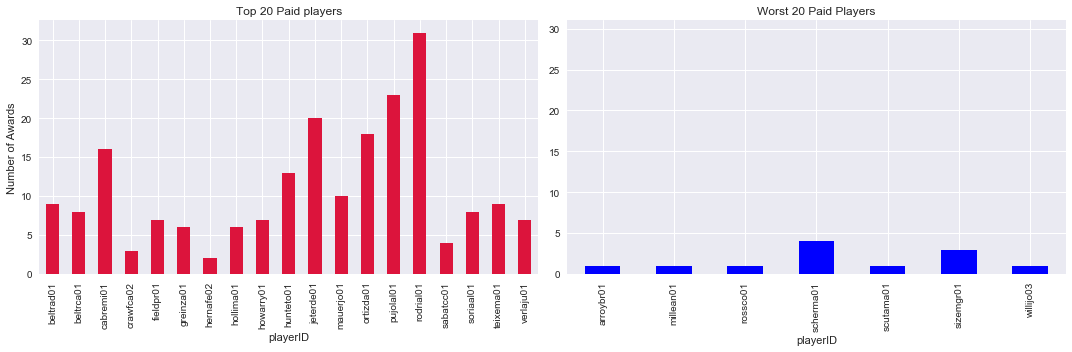

In [67]:
plot_function(top_players_awards, worst_players_awards, "awards", 'Number of Awards')

In [68]:
#Added to include the player that didnt get an awards
all_top_players_awards = top_players_awards.merge(top_20_players, how='outer')

In [69]:
correlation(all_top_players_awards.fillna(value=0)['awards'], top_20_players['sum'])

-0.12813107636747187

In [70]:
all_worst_players_awards = worst_players_awards.merge(top_20_players, how='outer')

In [71]:
correlation(all_worst_players_awards.fillna(value=0)['awards'], top_20_players['sum'])

0.53486677963212492

##### Summary 4:
Null hypothesis: Awards gained has no affect on the player salary

Alternative hypothesis: The more awards the better his salary as he becomes more valuable

We have something very intersting here. We can see that the there is a high correlation between number od awards a player get and the his salary for low paid players, and this is aligned with my prediction but yet the sample is hugely small and is skewing the results and becomes evident when I see that the top players have a negative correlation, in other words, the more you get in awards the lower your salary and especially that one of the top paid players had zero awards in the past 10 years.

Such a hypothesis needs more investigation, for example, maybe I need to investigate more into the type of awards, maybe they are more given to players at specific positions, or maybe the awardign system in baseball changed in the past 10 years, even maybe awards are no more significant to baseball players as they are in football or basketball. Unless I can investigate these, I dont think I have any hypothesis here.

#### f. Lets see if there is a better chance you get higher salary if you are of a specific height 

In [72]:
top_player_data= merge_tables(top_20_players, master_new)
worst_player_data = merge_tables(worst_20_players, master_new)

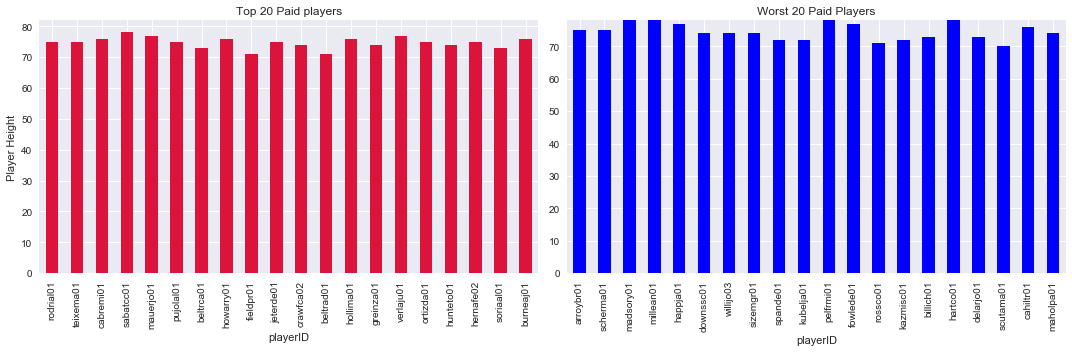

In [73]:
plot_function(top_player_data, worst_player_data, "height", 'Player Height')

In [74]:
top_player_data['height'].mean()

74.799999999999997

In [75]:
worst_player_data['height'].mean()

74.650000000000006

Just looking at the above graph, I can see that the height is almost similar to all baseball players and it aint a difference to be considered

#### g. Played at college

In [76]:
top_college_players = merge_tables(top_20_players, CollegePlaying)
len(top_college_players['playerID'].unique())

4

In [77]:
worst_college_players = merge_tables(worst_20_players, CollegePlaying)
len(worst_college_players['playerID'].unique())

7

#### h. Number of times layers participated in the All Star Games

In [78]:
top_players_all_star = merge_tables(top_20_players, AllStarFull_New).groupby('playerID')['yearID'].count()\
.to_frame('all_star_games').reset_index()

In [79]:
worst_players_all_star = merge_tables(worst_20_players, AllStarFull_New).groupby('playerID')['yearID'].count()\
.to_frame('all_star_games').reset_index()

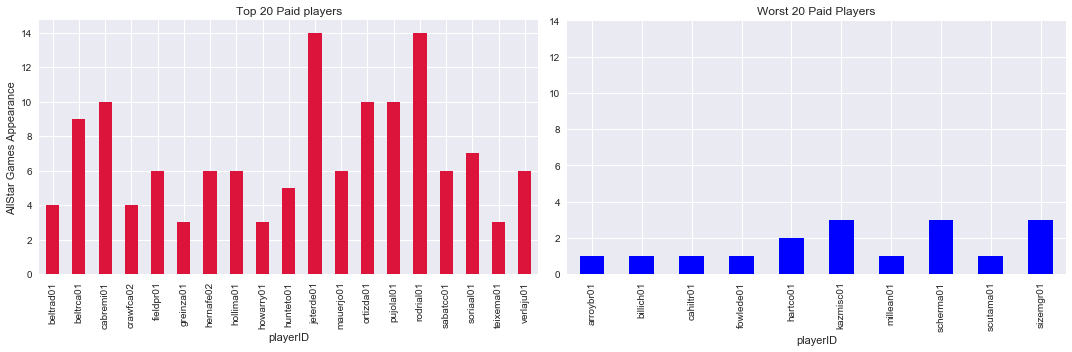

In [80]:
plot_function(top_players_all_star, worst_players_all_star, "all_star_games", 'AllStar Games Appearance')

In [81]:
correlation(top_players_all_star['all_star_games'], top_20_players['sum'])

-0.18767784366842855

##### Summary 5:
Null hypothesis: All Star Appearance has no affect on the player salary

Alternative hypothesis: The more a players participate in All Star Games the better his salary

In this sample, there seems to be negative correlation between these 2 variables, and I believe it is due to thesize of the sample making the study obselete, to fix it we need to include more subjects for our analysis.


### Question 3: I want to figure out of there is a correlation between players salaries and awards won?

In [82]:
#Counting number of awards a player acquired during his career
count_awards = grouping_count(AwardsPlayers, 'awardID')

In [83]:
#Merge both tables (salary and awards count) in one table by playerID
player_awards_salary = merge_tables(count_awards, Salaries)

In [84]:
#Check for correlation between the 2 variables
correlation(player_awards_salary['count'], player_awards_salary['salary'])

0.20481041749788439

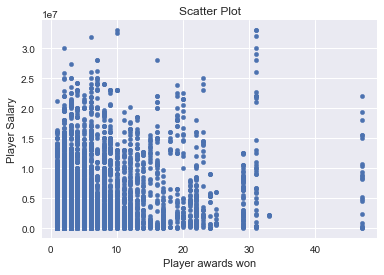

In [85]:
ax = player_awards_salary.plot.scatter(x='count', y='salary', title='Scatter Plot')
ax.set_xlabel("Player awards won")
ax.set_ylabel("Player Salary")

### Results:
Null hypothesis: Player awards does not affect salary

Alternative hypothesis: Players awards yield higher salary because they become more valuable and attractive

There is a correlation between these variables which align with our expectation especially that the analysis takes into consideration all the population of players whom ever got rewarded. Still we cant reject the null because there are lots of other factors to be investigated in the award itself. Also combining this variable with the other variables make it more sense to reach a hypothesis.


# Conclusion:

In studying what basically affects a baseball player salary we have investigated few variables, although we can see some correlation, we know that there are lots of lurking variables especially that we are not controlling any given variables when conducting the observation.

So basically our target variables were the player’s salary and the predictor variables that we investigated where the below:

1. Team with the highest All Star appearances, looking at this variable in correlation with player salary of this team and that of the entire league, we couldn’t reach a definitive result but we were capable of concluding that there is a correlation between the team that sends most players but it seemed a low correlation because taking this predictor variable alone is not enough. To get this variable more useful, we have to understand how are players selected for the All Star Games league and does the team with the highest appearance usually the highest paying team.

2. Here I investigated some important baseball KPIs which I used as variables to check if they affect the player salary. This approach is limited as it was conducted on a small sample which can severely skew my results. The study was conducted on the last 10 years and for 40 players, 20 top highest paid players and 20 bottom paid players. I did this study because I was curious whether players get paid the most because they are good at the game or do they get good at playing baseball because they play a lot and thus get paid higher. I can admit that I haven’t scratch the surface regarding what variables affect player’s salary but I reached the below:

    1. BA (Batting Average), looking at this variable we can see a slight correlation between these 2 variables but to better understand and see the effect on salary, we need to expand our scope of samples to maybe include all players.
    
    2. Number of games played, I believe this variable has a lot of influence on the player salary, because we can see a correlation between top players number of games and salary, also we need to expand our scope of samples to maybe include all players.
    
    3. Number of awards, looking at the correlation it’s a bit strange because I expected players to get higher salary if they get more awards, for that I think we need to drop this variable because it seems there is no enough evidence that this variable has an effect on salary, maybe we need to select a specific types of rewards and then study their effect on player salary or expand the sample size.
    
    4. Player height, unlike basketball, it is obvious that this variable has to be dropped as it has no effect on player salary as the mean of player height is similar among top and bottom players.
   
3. In regard to the number of awards, I have expanded it to include the entire population and what we can see is aligned with our predictions although the correlation is only 20%. Looking at the scatter plot I can see that we can’t draw a line where the salary increase with the awards won by a player which can be due to some outliers and other factors that need to be investigated. 

4. Bottom line, I think for the data to make more sense we need to agree on a set of variables that might affect the salary, then apply a multi variable linear regression model to detect which variables have the highest effect because taking every variable on it own will not give any solid results. After running the model, we can then validate it by predicting future salaries of players.